# Brief Review of Linear Algebra

Content and structure mainly from: http://www.deeplearningbook.org/contents/linear_algebra.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Scalars

- Single number
- Denoted as lowercase letter
- Examples
    - $x \in \mathbb{R}$ - Real number
    - $y \in \{0, 1, \dots, C\}$ - Finite set
    - $u \in [0, 1]$ - Bounded set

In [2]:
x = 1.1343
print(x)
z = int(-5)
print(z)

1.1343
-5


# Vectors

- Array of numbers
- In notation, we usually consider vectors to be "column vectors"
- Denoted as lowercase letter (often bolded)
- Dimension is often denoted by $d$, $D$, or $p$.
- Access elements via subscript, e.g., $x_i$ is the $i$-th element
- Examples
    - $\mathbf{x} \in \mathbb{R}^d$
    - $\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_d \end{bmatrix} $
    - $\mathbf{x} = [x_1, x_2, \dots, x_d]^T$
    - $\mathbf{z} = [\sqrt{x_1}, \sqrt{x_2}, \dots, \sqrt{x_d}]^T$
    - $\mathbf{y} \in \{0, 1, \dots, C\}^d$ - Finite set
    - $\mathbf{u} \in [0, 1]^d$ - Bounded set

In [3]:
x = np.array([1.1343, 6.2345, 35])
print(x)
z = 5 * np.ones(3, dtype=int)
print(z)

[ 1.1343  6.2345 35.    ]
[5 5 5]


# Note: The operator `+` does different things on numpy arrays vs Python lists

- For lists, Python concatenates the lists
- For numpy arrays, numpy performs an element-wise addition
- Similarly, for other binary operators such as `-`, `+`, `*`, and `/`

In [4]:
a_list = [1, 2]
b_list = [30, 40]
c_list = a_list + b_list
print(c_list)
a = np.array(a_list)  # Create numpy array from Python list
b = np.array(b_list)
c = a + b
print(c)

[1, 2, 30, 40]
[31 42]


In [5]:
type(a_list)

list

In [6]:
type(a)

numpy.ndarray

# Matrices

- 2D array of numbers
- Denoted as uppercase letter
- Number of samples often denoted by $n$ or $N$.
- Access rows or columns via subscript or numpy notation:
    - $X_{i,:}$ is the $i$-th row, $X_{:,j}$ is the $j$th column
    - (Sometimes) $X_i$, $\mathbf{x}_i$ is the $i$-th row or column depending on context
- Access elements by double subscript $X_{i,j}$ or $x_{i,j}$ is the $i,j$-th entry of the matrix
- Examples
    - $X \in \mathbb{R}^{n \times d}$ - Real number
    - $X = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix}$ - Real number
    - $Y \in \{0, 1, \dots, C\}^{k \times d}$ - Finite set
    - $U \in [0, 1]^{n \times d}$ - Bounded set

In [7]:
X = np.arange(12).reshape(3,4)
print(X)
W = np.array([
    [1.1343 + 2.1j, 1j, 0.1 + 3.5j],
    [3, 4, 5],
])
print(W)
Z = 5 * np.ones((3, 3), dtype=int)
print(Z)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[1.1343+2.1j 0.    +1.j  0.1   +3.5j]
 [3.    +0.j  4.    +0.j  5.    +0.j ]]
[[5 5 5]
 [5 5 5]
 [5 5 5]]


# Tensors

- $n$-D arrays
- Examples
    - $X \in \mathbb{R}^{3 \times m \times m}$, single color image in PyTorch
    - $X \in \mathbb{R}^{n \times 3 \times m \times m}$, multiple color images in PyTorch
    - $X \in \mathbb{R}^{m \times m \times 3}$, single color image for matplotlib imshow

Shape of image (height, width, channels): (427, 640, 3)


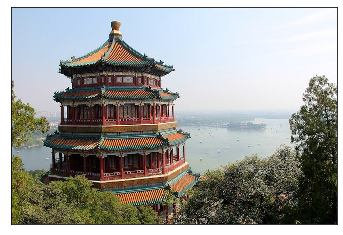

In [8]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
print('Shape of image (height, width, channels):', china.shape)
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

# Matrix transpose

- Changes columns to rows and rows to columns 
- Denoted as $A^T$
- For vectors $\mathbf{v}$, the transpose changes from a column vector to a row vector
    $$
    \begin{align}
    \mathbf{x} &= \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_d \end{bmatrix}, &
    \mathbf{x}^T &= \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_d \end{bmatrix}^T = [x_1, x_2, \dots, x_d]
    \end{align}
    $$
    
###  NOTE: In numpy, there is only a "vector" (i.e., a 1D array), not really a row or column vector per se.

In [9]:
A = np.arange(6).reshape(2,3)
print(A)
print(A.T)

[[0 1 2]
 [3 4 5]]
[[0 3]
 [1 4]
 [2 5]]


###  NOTE: In numpy, there is only a "vector" (i.e., a 1D array), not really a row or column vector per se.

In [10]:
v = np.arange(5)
print('A numpy vector', v)
print('Transpose of numpy vector', v.T)
print('A matrix with one column')
V = v.reshape(-1, 1)
print('V shape: ', V.shape)
print(V)

A numpy vector [0 1 2 3 4]
Transpose of numpy vector [0 1 2 3 4]
A matrix with one column
V shape:  (5, 1)
[[0]
 [1]
 [2]
 [3]
 [4]]


# Matrix product

- Let $A \in \mathbb{R}^{m \times n}$, $B \in \mathbb{R}^{n \times p}$, then the **matrix product** $ C = AB $ is defined as:
  $$ c_{i,j} = \sum_{k \in \{1,2,\dots,n\}} a_{i,k} b_{k,j}$$
  where $C \in \mathbb{R}^{m \times p}$ (notice how inner dimension is collapsed.
- (Show on board visually)
 

In [11]:
A = np.arange(6).reshape(3, 2)
print(A)
B = np.arange(6).reshape(2, 3)
print(B)
C = np.zeros((A.shape[0], B.shape[1]))
for i in range(C.shape[0]):
    for j in range(C.shape[1]):
        for k in range(A.shape[1]):
            C[i, j] += A[i, k] * B[k, j]
print(C)
print(np.dot(A, B))

[[0 1]
 [2 3]
 [4 5]]
[[0 1 2]
 [3 4 5]]
[[ 3.  4.  5.]
 [ 9. 14. 19.]
 [15. 24. 33.]]
[[ 3  4  5]
 [ 9 14 19]
 [15 24 33]]


# Notice triple loop, naively cubic complexity $O(n^3)$

### However, special linear algebra algorithms can do it $O(n^{2.803})$
### Takeaway - Use numpy `np.dot` or `np.matmult`

# Element-wise (Hadamard) product *NOT equal* to matrix multiplication

- Normal matrix mutiplication $C = AB$ is very different from **element-wise** (or more formally **Hadamard**) multiplication, denoted $F = A \odot D$, which in numpy is just the star `*`

In [12]:
A = np.arange(6).reshape(3, 2)
print(A)
B = np.arange(6).reshape(2, 3)
print(B)
try:
    A * B  # Fails since matrix shapes don't match and cannot broadcast
except ValueError as e:
    print('Operation failed! Message below:')
    print(e)

[[0 1]
 [2 3]
 [4 5]]
[[0 1 2]
 [3 4 5]]
Operation failed! Message below:
operands could not be broadcast together with shapes (3,2) (2,3) 


In [13]:
print(A)
D = 10*B.T
print(D)
F = A * D  # Element-wise / Hadamard product
print(F)

[[0 1]
 [2 3]
 [4 5]]
[[ 0 30]
 [10 40]
 [20 50]]
[[  0  30]
 [ 20 120]
 [ 80 250]]


# Properties of matrix product

- Distributive: $A(B+C) = AB + AC$
- Associative: $A(BC) = (AB)C$
- **NOT** commutative, i.e., $AB = BA$ does **NOT** always hold
- Transpose of multiplication (**switch order** and transpose of both):
    $$(AB)^T = B^T A^T$$
  

In [14]:
print('AB')
print(np.dot(A, B))
print('BA')
print(np.dot(B, A))
print('(AB)^T')
print(np.dot(A, B).T)
print('B^T A^T')
print(np.dot(B.T, A.T))

AB
[[ 3  4  5]
 [ 9 14 19]
 [15 24 33]]
BA
[[10 13]
 [28 40]]
(AB)^T
[[ 3  9 15]
 [ 4 14 24]
 [ 5 19 33]]
B^T A^T
[[ 3  9 15]
 [ 4 14 24]
 [ 5 19 33]]


# Properties of inner product or vector-vector product

- **Inner product** or **vector-vector** multiplication produces *scalar*:
  $$\mathbf{x}^T \mathbf{y} = (\mathbf{x}^T \mathbf{y})^T = \mathbf{y}^T \mathbf{x}$$
  Also denoted as:
  $$\langle \mathbf{x}, \mathbf{y}\rangle = \mathbf{x}^T \mathbf{y}$$
  Can be executed via `np.dot`
  

In [15]:
# Inner product
a = np.arange(3)
print(a)
b = np.array([11, 22, 33])
print(b)
np.dot(a, b)

[0 1 2]
[11 22 33]


88

# Identity matrix keeps vectors unchanged 

- Multiplying by the identity does not change vector (generalizing the concept of the scalar 1)
- Formally, $I_n \in \mathbb{R}^{n \times n}$, and $\forall \mathbf{x} \in \mathbb{R}^n, I_n \mathbf{x} = \mathbf{x}$
- Structure is ones on the diagonal, zero everywhere else:
- `np.eye` function to create identity

In [16]:
I3 = np.eye(3)
print(I3)
x = np.random.randn(3)
print(x)
print(np.dot(I3, x))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[ 0.3896596  -1.71754999 -0.92813567]
[ 0.3896596  -1.71754999 -0.92813567]


# Matrix inverse times the original matrix is the identity

- The inverse of *square* matrix $A \in \mathbb{n \times n}$ is denoted as $A^{-1}$ and defined as:
    $$ A^{-1} A = I $$
- The "right" inverse is similar and is equal to the left inverse:
    $$ A A^{-1} = I $$
- Generalizes the concept of inverse $x$ and $\frac{1}{x}$
- Does **NOT** always exist, similar to how the inverse of $x$ only exists if $x \neq 0$

In [17]:
A = 100 * np.array([[1, 0.5], [0.2, 1]])
print(A)
Ainv = np.linalg.inv(A)
print(Ainv)
print('A^{-1} A = ')
print(np.dot(Ainv, A))
print('A A^{-1} = ')
print(np.dot(A, Ainv))

[[100.  50.]
 [ 20. 100.]]
[[ 0.01111111 -0.00555556]
 [-0.00222222  0.01111111]]
A^{-1} A = 
[[1.00000000e+00 0.00000000e+00]
 [2.77555756e-17 1.00000000e+00]]
A A^{-1} = 
[[1.00000000e+00 0.00000000e+00]
 [2.77555756e-17 1.00000000e+00]]


# Linear set of equations can be compactly represented as matrix equation

- Example:
    $$
    {\begin{alignedat}{5}2x&&\;+\;&&3y&&\;=\;&&6&\\4x&&\;+\;&&9y&&\;=\;&&15&.\end{alignedat}}
    $$
    Solution is $x=\frac{3}{2}, y=1$

- More general example:
    $$
    \begin{align}
    a_{1,1} x_1 + a_{1,2} x_2 + a_{1,3} x_3 &= b_1 \\
    a_{2,1} x_1 + a_{2,2} x_2 + a_{2,3} x_3 &= b_2 \\
    a_{3,1} x_1 + a_{3,2} x_2 + a_{3,3} x_3 &= b_3 \\
    \end{align}
    $$
    is **equivalent** to:
    $$ A\mathbf{x} = \mathbf{b} $$
    where $A \in \mathbb{R}^{3,3}$, $\mathbf{x} \in \mathbb{R}^{3}$ and $\mathbf{b} \in \mathbb{R}^3$.
    
- If matrix inverse exists, then solution is $$\mathbf{x} = A^{-1}b$$.

# Singular matrices are similar to zeros

- Informally, singular matrices are matrices that do not have an inverse (similar to the idea that 0 does not have an inverse)
- Consider the 1D equation $ax = b$
    - Usually we can solve for $x$ by multiplying both sides by $1/a$
    - But what if $a = 0$?
    - What are the solutions to the equation?
- Called "singular" because a random matrix is unlikely to be singular just like choosing a random number is unlikely to be 0.

In [18]:
from numpy.linalg import LinAlgError
def try_inv(A):
    print('A = ')
    print(np.array(A))
    try: 
        np.linalg.inv(A)
    except LinAlgError as e:
        print(e)
    else:
        print('Not singular!')
    print()
        
try_inv([[0, 0], [0, 0]])
try_inv(np.eye(3))
try_inv([[1, 1], [1, 1]])
try_inv([[1, 10], [1, 10]])
try_inv([[2, 20], [4, 40]])
try_inv([[2, 20], [40, 4]])

A = 
[[0 0]
 [0 0]]
Singular matrix

A = 
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Not singular!

A = 
[[1 1]
 [1 1]]
Singular matrix

A = 
[[ 1 10]
 [ 1 10]]
Singular matrix

A = 
[[ 2 20]
 [ 4 40]]
Singular matrix

A = 
[[ 2 20]
 [40  4]]
Not singular!



In [19]:
# Random matrix is very unlikely to be 0
for j in range(10):
    try_inv(np.random.randn(2, 2))

A = 
[[ 1.16114085 -0.10974983]
 [ 2.09474898  1.2487792 ]]
Not singular!

A = 
[[-0.75619391  0.20525935]
 [-1.14261116 -1.93697763]]
Not singular!

A = 
[[-0.04182927 -0.39980286]
 [ 1.45247823 -2.72826103]]
Not singular!

A = 
[[-0.11885811 -0.00885784]
 [ 1.07430215 -1.20417091]]
Not singular!

A = 
[[-0.89227661  0.42899549]
 [ 1.28606768  1.30003139]]
Not singular!

A = 
[[-0.66149126  0.53529993]
 [ 0.82891445  0.23417537]]
Not singular!

A = 
[[-0.83419189 -0.28147647]
 [ 0.17425551  1.25763145]]
Not singular!

A = 
[[ 0.45702781 -1.9701417 ]
 [-0.788644    0.05494979]]
Not singular!

A = 
[[ 1.31135285 -0.76101125]
 [ 2.95806377  1.4250975 ]]
Not singular!

A = 
[[ 1.02581335 -0.18834047]
 [-1.00288217  0.0679856 ]]
Not singular!



# Norms: The "size" of a vector or matrix

- Informally, a generalization of the absolute value of a scalar
- Formally, a norm is an function $f$ that has the following three properties:
    - $f(\mathbf{x}) = 0 \Rightarrow \mathbf{x} = \mathbf{0}$ (zero point)
    - $f(\mathbf{x} + \mathbf{y}) \leq f(\mathbf{x}) + f(\mathbf{y})$ (Triangle inequality)
    - $\forall \alpha \in \mathbb{R}, f(\alpha \mathbf{x}) = |\alpha|f(\mathbf{x})$ (absolutely homogenous) 
- Examples
    - Absolute value of scalars
    - $L^p$ (also denoted $\ell_p$) norm
    $$ \| \mathbf{x} \|_p = \left(\sum_{i=1}^d |x_i|^p\right)^{\frac{1}{p}} $$
    - (Discussion) What does this represent when $p=2$ (for simplicity you can assume $d=2$)?
        - When $p=2$, we often merely denote as $\|\mathbf{x}\|$.
    - What about when $p=1$?
    - What about when $p=\infty$ (or more formally the limit as $p \to \infty$)?

In [20]:
x = np.array([1, 1])
print(np.linalg.norm(x, ord=2))
print(np.linalg.norm(x, ord=1))
print(np.linalg.norm(x, ord=np.inf))

1.4142135623730951
2.0
1.0


## Vectors that have the same norm form a "ball" that isn't necessarily circular

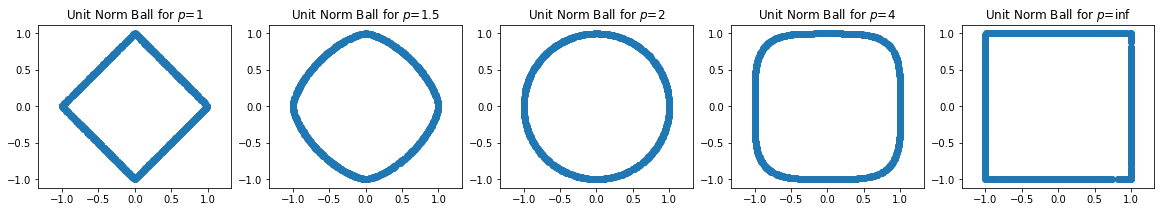

In [21]:
rng = np.random.RandomState(0)
X = rng.randn(1000, 2)

p_vals = [1, 1.5, 2, 4, np.inf]
fig, axes = plt.subplots(1, len(p_vals), figsize=(len(p_vals)*4, 3))

for p, ax in zip(p_vals, axes):
    # Normalize them to have the unit norm
    Z = (X.T / np.linalg.norm(X, ord=p, axis=1)).T
    ax.scatter(Z[:, 0], Z[:, 1])
    ax.axis('equal')
    ax.set_title('Unit Norm Ball for $p$=%g' % p)

## *Squared* $L_2$ norm is quite common since it simplifies to a simple summation

$$ \|\mathbf{x}\|_2^2 = \left(\left(\sum_{i=1}^d |x_i|^2 \right)^{\frac{1}{2}}\right)^2 = \sum_{i=1}^d |x_i|^2 = \sum_{i=1}^d x_i^2 $$

- Additionally, this can be computed as $\|\mathbf{x}\|_2^2 = \mathbf{x}^T \mathbf{x}$
- Informally, this is analogous to taking the square of a scalar number

In [22]:
x = np.arange(4)
print(np.linalg.norm(x, ord=2)**2)
print(np.dot(x, x))

14.0
14


# Orthogonal vectors

- Orthogonal vectors are vectors such that $\mathbf{x}^T \mathbf{y} = 0$
- The dot product between vectors can be written in terms of norms and the cosine of the angle:
    $$ \mathbf{x}^T \mathbf{y} = \|\mathbf{x}\|_2 \|\mathbf{y}\|_2 \cos \theta $$
- (Discussion) Suppose $\mathbf{x}$ and $\mathbf{y}$ are non-zero vectors, what must $\theta$ be if the vectors are orthogonal?

In [23]:
print(np.dot([0, 1], [1, 0]))
theta = np.pi/2
x = np.array([np.cos(theta), -np.sin(theta)])
y = np.array([np.sin(theta), np.cos(theta)])
print(x)
print(y)
print(np.dot(x, y))

0
[ 6.123234e-17 -1.000000e+00]
[1.000000e+00 6.123234e-17]
0.0


# Special matrices: Orthogonal matrices

- Informally, an orthogonal matrix only rotates (or reflects) vectors around the origin (zero point), but does not change the size of the vectors.
- Informally, almost analagous to a 1 for matrices but more general
- A *square* matrix such that $Q^T Q = Q Q^T = I$
- Or, equivalently $Q^{-1} = Q^T$
- Or, equivalently:
    - Every column (or row) is orthogonal to every other column (or row)
    - Every column (or row) has unit $L^2$ norm, i.e., $\|Q_{i,:}\|_2 = \|Q_{:,j}\|_2 = 1$

In [24]:
print('Identity matrix')
Q = np.eye(2) # Identity
print(Q)
print(np.allclose(np.eye(2), np.dot(Q.T, Q)))

print('Reflection matrix')
Q = np.array([[1, 0], [0, -1]]) # Reflection
print(Q)
print(np.allclose(np.eye(2), np.dot(Q.T, Q)))

print('Rotation matrix')
theta = np.pi/3
Q = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])
print(Q)
print(np.allclose(np.eye(2), np.dot(Q.T, Q)))

Identity matrix
[[1. 0.]
 [0. 1.]]
True
Reflection matrix
[[ 1  0]
 [ 0 -1]]
True
Rotation matrix
[[ 0.5       -0.8660254]
 [ 0.8660254  0.5      ]]
True


# Other special matrices: Symmetric, Triangular, Diagonal

- Symmetric matrices are symmetric around the diagonal; formally, $A = A^T$
- Triangular matrices only have non-zeros in the upper or lower triangular part of the matrix
- Diagonal matrices only have non-zeros along the diagonal of a matrix

In [25]:
A = np.arange(25).reshape(5, 5)+1
print('Symmetric')
print(A + A.T)
print('Upper triangular')
print(np.triu(A))
print('Lower triangular')
print(np.tril(A))
print('Diagonal (both upper and lower triangular)')
print(np.diag(np.arange(5) + 1))

Symmetric
[[ 2  8 14 20 26]
 [ 8 14 20 26 32]
 [14 20 26 32 38]
 [20 26 32 38 44]
 [26 32 38 44 50]]
Upper triangular
[[ 1  2  3  4  5]
 [ 0  7  8  9 10]
 [ 0  0 13 14 15]
 [ 0  0  0 19 20]
 [ 0  0  0  0 25]]
Lower triangular
[[ 1  0  0  0  0]
 [ 6  7  0  0  0]
 [11 12 13  0  0]
 [16 17 18 19  0]
 [21 22 23 24 25]]
Diagonal (both upper and lower triangular)
[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]


## Multiplying a matrix by a diagonal matrix scales the columns or rows

- Right multiplication scales rows
- Left multiplication scales columns

In [26]:
A = np.arange(16).reshape(4, 4)
print(A)
D = np.diag(10**(np.arange(4)))
diag_vec = np.diag(D)
print(D)
print('AD')
print(np.dot(A, D))
print('AD (via numpy * and broadcasting)')
print(A * diag_vec)
print('DA')
print(np.dot(D, A))
print('DA (via numpy * and broadcasting)')
print((A.T * diag_vec).T)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[   1    0    0    0]
 [   0   10    0    0]
 [   0    0  100    0]
 [   0    0    0 1000]]
AD
[[    0    10   200  3000]
 [    4    50   600  7000]
 [    8    90  1000 11000]
 [   12   130  1400 15000]]
AD (via numpy * and broadcasting)
[[    0    10   200  3000]
 [    4    50   600  7000]
 [    8    90  1000 11000]
 [   12   130  1400 15000]]
DA
[[    0     1     2     3]
 [   40    50    60    70]
 [  800   900  1000  1100]
 [12000 13000 14000 15000]]
DA (via numpy * and broadcasting)
[[    0     1     2     3]
 [   40    50    60    70]
 [  800   900  1000  1100]
 [12000 13000 14000 15000]]


## Inverse of diagonal matrix is formed merely by taking inverse of diagonal elements

- Most operations on diagonal matrices are just the scalar versions of their entries

In [27]:
A = np.diag(np.arange(5)+1)
print(A)
diag_A = np.diag(A)
print('diag_A', diag_A)
diag_A_inv = 1 / diag_A
print('diag_A_inv', diag_A_inv)
Ainv = np.diag(diag_A_inv)
print(Ainv)
Ainv_full = np.linalg.inv(A)
print(Ainv_full)

[[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 0 0 5]]
diag_A [1 2 3 4 5]
diag_A_inv [1.         0.5        0.33333333 0.25       0.2       ]
[[1.         0.         0.         0.         0.        ]
 [0.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.        ]
 [0.         0.         0.         0.25       0.        ]
 [0.         0.         0.         0.         0.2       ]]
[[ 1.          0.          0.          0.          0.        ]
 [ 0.          0.5         0.          0.          0.        ]
 [ 0.          0.          0.33333333  0.          0.        ]
 [-0.         -0.         -0.          0.25       -0.        ]
 [ 0.          0.          0.          0.          0.2       ]]


# Motivation: Matrix decompositions allow us to *understand* and *manipulate* matrices both theoretically and practically

- Analagous to prime factorization of an integer, e.g., $12 = 2 \times 2 \times 3$
    - Allows us to determine whether things are divisible by other integers
- Analagous to representing a signal in the time versus frequency domain
    - Both domains represent the same object but are useful for different computations and derivations


# Eigendecomposition

- For real **symmetric** matrices, the eigendecomposition is:
    $$ A = Q \Lambda Q^T $$
  where $Q$ is an **orthogonal** matrix and $\Lambda$ is a **diagonal** matrix.
- Often *in notation*, it is assumed that the diagonal of $\Lambda$, denoted $\mathbf{\lambda}$ is ordered by decreasing values, i.e., $\lambda_1 \geq \lambda_2, \geq \cdots \geq \lambda_d$. 
- $\mathbf{\lambda}$ are known as the **eigenvalues** and $Q$ is known as the **eigenvector matrix**


In [28]:
rng = np.random.RandomState(0)
B = rng.randn(4,4)
A = B + B.T # Make symmetric
lam, Q = np.linalg.eig(A)
print(np.diag(lam))
print(Q)
A_reconstructed = np.dot(np.dot(Q, np.diag(lam)), Q.T)
print('Are all entries equal up to machine precision?')
print('Yes' if np.allclose(A, A_reconstructed) else 'No')

[[ 6.54930093  0.          0.          0.        ]
 [ 0.         -3.728219    0.          0.        ]
 [ 0.          0.          0.45077461  0.        ]
 [ 0.          0.          0.         -0.7428718 ]]
[[ 0.77115168  0.36010163  0.51908231 -0.07877468]
 [ 0.25392564 -0.75129904  0.0518548  -0.60694531]
 [ 0.31251286  0.37021589 -0.78092889 -0.394241  ]
 [ 0.49313545 -0.41087317 -0.34353267  0.68555523]]
Are all entries equal up to machine precision?
Yes


## Simple properties based on eigendecomposition

- $A^{-1}$ is easy to compute 
    - Easy to solve equation $A\mathbf{x} = \mathbf{b}$
- Powers of matrix is easy to compute $A^3 = A A A$.
- The matrix is singular if and only if there is a zero in $\mathbf{\lambda}$

## *Positive definite (or semidefinite)* matrices have positive (or possibly 0) eigenvalues 

- $A$ is positive definite (PD) if and only if $\forall \mathbf{x}, \mathbf{x}^T A \mathbf{x} > 0$
- Positive semi-definite (PSD) is where there could be **zero** eigenvalues.
- Informally, a PD matrix is like $a > 0$ in a quadratic formula, $ax^2$
    - Scalar quadratic: $ax^2 + bx + c$
    - Vector quadratic: $\mathbf{x}^T A \mathbf{x} + \mathbf{b}^T \mathbf{x} + c$
    - $A$ is a generalization of $a$ in the scalar equation
- If not positive definite, there may be saddle points.

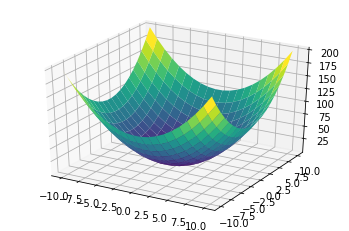

In [29]:
# Get random orthogonal matrix Q
rng = np.random.RandomState(0)
Q, _ = np.linalg.qr(rng.randn(2, 2))
# Create positive definite matrix
lam = np.array([1, 1])  # Positive definite
#lam = np.array([1, 1])  # Negative definite
#lam = np.array([-1, 1])  # Not positive or negative definite

# Construct a matrix from Q and lambda
A = np.dot(np.dot(Q, np.diag(lam)), Q.T)

# Plot 3D
from mpl_toolkits.mplot3d import Axes3D
v = np.linspace(-10, 10, num=20)
xx, yy = np.meshgrid(v, v)
X = np.array([xx.ravel(), yy.ravel()]).T
f = np.sum(np.dot(A, X.T) * X.T, axis=0)
ff = f.reshape(xx.shape)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, ff, cmap='viridis')

# Singular value decomposition of *any* matrix (The decomposition to end all decompositions)

- For **any** matrix $A \in \mathbb{R}^{m \times n}$ (even non-square), the singular value decomposition is:
    $$ A = U \Sigma V^T $$
  where $U \in \mathbb{R}^{m \times m}$ and $V \in \mathbb{R}^{n \times n}$ are **orthogonal** matrices and $\Sigma \in \mathbb{R}^{m \times n}$ is a **diagonal** (though not necessarily square) matrix.
- Often in notation, it is assumed that the diagonal of $\Sigma$, denoted $\mathbf{\sigma}$ is ordered by decreasing values, i.e., $\sigma_1 \geq \sigma_2, \geq \cdots \geq \sigma_d$. 
- $\mathbf{\sigma}$ are known as the **singular values** and $U$ and $V$ are known as the **left singular vectors** and the **right singular vectors** respectively.

In [30]:
rng = np.random.RandomState(0)
A = np.arange(6).reshape(2, 3)
print('A', A.shape)
print(A)

# Note returns V^T (i.e. transpose) rather than V
U, s, Vt = np.linalg.svd(A, full_matrices=True)

# Convert singular vector to matrix
Sigma = np.zeros_like(A, dtype=float)
Sigma[:2, :2] = np.diag(s)

print('U', U.shape)
print('Sigma', Sigma.shape)
print('Vt', Vt.shape)

A_reconstructed = np.dot(U, np.dot(Sigma, Vt))
print('Are all entries equal up to machine precision?')
print('Yes' if np.allclose(A, A_reconstructed) else 'No')

A (2, 3)
[[0 1 2]
 [3 4 5]]
U (2, 2)
Sigma (2, 3)
Vt (3, 3)
Are all entries equal up to machine precision?
Yes


## *Rank* $\text{rank}(A)$ is the number of linearly independent columns

- Consider an example of two equations with two unknowns (Is there a unique solution?):
    - $2x + 3y = 0$
    - $4x + 6y = 1$
- Similar to a matrix $A = \begin{bmatrix} 2 & 3 \\ 4 & 6 \end{bmatrix}$, notice "redundancy"
- SVD -> Rank = Number of non-zero singular values
- If $A \in \mathbb{R}^{d \times d}$, $A$ is not singular if and only if $\text{rank}(A) = d$.
- Simplest case is rank 1 matrix: $\mathbf{x}\mathbf{y}^T$ (show on board)
    - **Notice difference from inner product, denoted as $\mathbf{x}^T\mathbf{y}$**
    - $\mathbf{x} \mathbf{y}^T$ is also known as the **outer product** of two vectors

## Matrix multiplication can be seen as a sum of rank 1 matrices

- $AB = \sum_{i=1}^d A_{:,i} B_{i,:}$, where $A_{:,i}$ is the $i$-th column of $A$ and $B_{i,:}$ is the $i$-th row of $B$

In [31]:
A = np.arange(6).reshape(2, 3)
print(A)
B = -np.arange(6).reshape(3, 2)
print(B)

AB_sum = np.zeros((2, 2))
for acol, brow in zip(A.T, B):
    AB_sum += np.outer(acol, brow)
    
print('AB sum formula')
print(AB_sum)

print('AB standard')
AB = np.dot(A, B)
print(AB)

[[0 1 2]
 [3 4 5]]
[[ 0 -1]
 [-2 -3]
 [-4 -5]]
AB sum formula
[[-10. -13.]
 [-28. -40.]]
AB standard
[[-10 -13]
 [-28 -40]]


## SVD provides powerful interpretation of matrix as sum of rank one matrices

$$ A = U \Sigma V^T = \sum_{i=1}^{\text{rank}(A)} \sigma_i \mathbf{u}_i \mathbf{v}_i^T $$

- SVD can be used to solve the following matrix approximation problem:
    $$ \min_B \|A - B\|_F \quad \text{s.t.} \quad \text{rank}(B) \leq r $$
    where $\|A\|_F$ is the Frobenius norm, or just like the $L^2$ norm but consider the matrix as a long vector.
    - Example: $$\|A\|_F = \left\|\begin{bmatrix} a & b \\ c & d \end{bmatrix} \right\|_F = \|[a,b,c,d]\|_2 $$

In [32]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
gray_china = china[:,:,0]/255.0
print('china matrix', gray_china.shape)
#print(gray_china)

U, s, Vt = np.linalg.svd(gray_china)
Sigma = np.zeros_like(gray_china, dtype=float)
Sigma[:427, :427] = np.diag(s)

china matrix (427, 640)


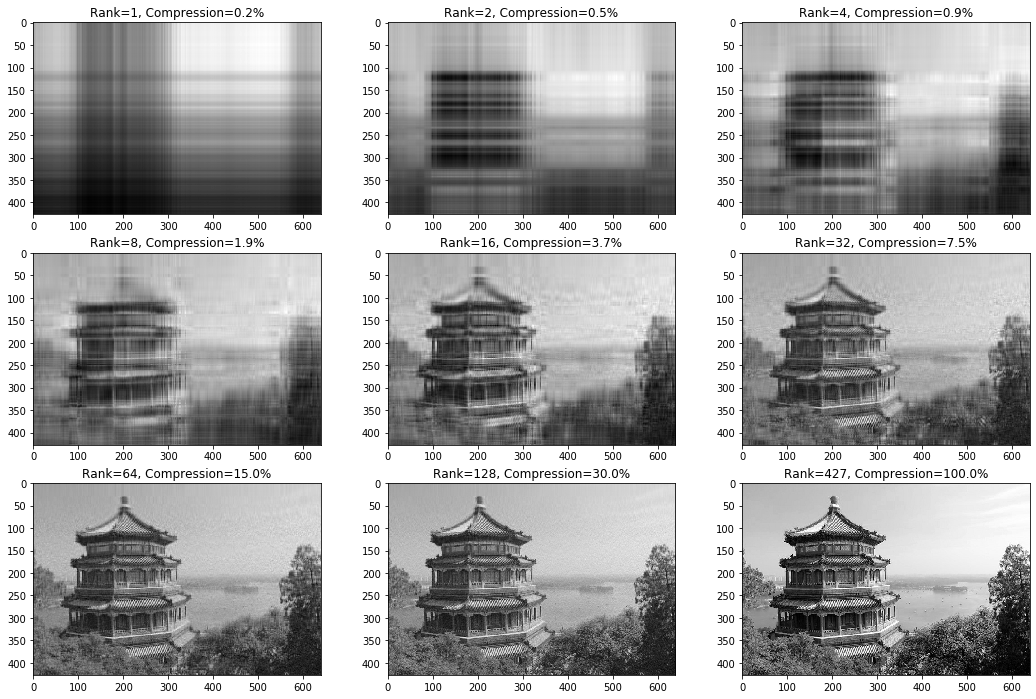

In [33]:
max_rank = np.min(gray_china.shape)
rank_arr = [1, 2, 4, 8, 16, 32, 64, 128, max_rank]
fig, axes = plt.subplots(3, 3, figsize=(len(rank_arr)*2, 3*4))
for r, ax in zip(rank_arr, axes.ravel()):
    china_approx = np.dot(U[:, :r], np.dot(Sigma[:r,:r], Vt[:r, :]))
    compression = r/max_rank
    ax.imshow(china_approx, cmap='gray')
    ax.set_title('Rank=%d, Compression=%.1f%%' % (r, compression*100))

## Usually the most important information is in the first few singular values

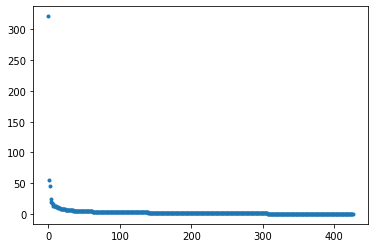

In [34]:
# The most important components are 
plt.plot(s,'.')

# *Determinant* $\text{det}(A)$ (of square matrix) is the product of eigenvalues $\mathbf{\lambda}$

$$ \text{det}(A) = |A| = \prod_{i=1}^d \lambda_i $$

- Absolute value of determinant roughly measures how much the matrix expands or contracts space
- Example: if determinant is 0, then compresses vectors onto a smaller subspace
- Example: if determinant is 1, then volume is preserved (how is this different than orthogonal matrix?)

In [35]:
A = np.arange(4).reshape(2,2)
print('A')
print(A)
print('prod of eigenvalues')
lam, Q = np.linalg.eig(A)
print(np.prod(lam))
print('det(A)')
print(np.linalg.det(A))

A
[[0 1]
 [2 3]]
prod of eigenvalues
-2.0
det(A)
-2.0


# *Trace* $\text{Tr}(A)$ operation

- Trace is just the sum of the diagonal elements of a matrix
    $$ \text{Tr}(A) = \sum_{i=1}^d a_{i,i} $$
- Most useful property is rotational equivalence:
    $$ \text{Tr}(ABC) = \text{Tr}(CAB) = \text{Tr}(BCA) $$
- In particular, (even if different dimensions)
    $$ \text{Tr}(AB) = \text{Tr}(BA) $$

In [36]:
A = np.arange(2*3).reshape(2,3)
B = A.copy().T
print('AB')
print(np.dot(A, B))
print('Tr(AB)')
print(np.trace(np.dot(A, B)))
print('Tr(BA)')
print(np.trace(np.dot(B, A)))
print('Tr(A^T B^T)')
print(np.trace(np.dot(A.T, B.T)))
print('Tr(B^T A^T)')
print(np.trace(np.dot(B.T, A.T)))

AB
[[ 5 14]
 [14 50]]
Tr(AB)
55
Tr(BA)
55
Tr(A^T B^T)
55
Tr(B^T A^T)
55
